## THE BRIDGE (Data Science Bootcamp - Agosto 2020)
##  PROYECTO GRUPO D 
________________
### Análisis de datos asociados al COVID-19 del grupo de paises conformado por Portugal, Venezuela, Turquía, Reino Unido y España.

Fuente de datos (Data Set)  "https://covid.ourworldindata.org/data/owid-covid-data.csv"

Team members: 
- José Luis Manjon  presimanjon@yahoo.es        git @JoseLuisManjon
- Filipa Teles      filipa.teles@icloud.com     git 
- Mónica Villasuso  villasuso.monica@gmail.com  git @MVillasuso
_________________

Import de las librerías requeridas para el análisis

In [5]:
import pandas as pd 
import json 
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Carga de datos en un dataframe de la fuente a utilizar

In [6]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_general = pd.read_csv(url, sep=",")
covid_general.head(10)

iso_code      continent location        date  total_cases  new_cases  \
0      ABW  North America    Aruba  2020-03-13          2.0        2.0   
1      ABW  North America    Aruba  2020-03-20          4.0        2.0   
2      ABW  North America    Aruba  2020-03-24         12.0        8.0   
3      ABW  North America    Aruba  2020-03-25         17.0        5.0   
4      ABW  North America    Aruba  2020-03-26         19.0        2.0   
5      ABW  North America    Aruba  2020-03-27         28.0        9.0   
6      ABW  North America    Aruba  2020-03-28         28.0        0.0   
7      ABW  North America    Aruba  2020-03-29         28.0        0.0   
8      ABW  North America    Aruba  2020-03-30         50.0       22.0   
9      ABW  North America    Aruba  2020-04-01         55.0        5.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                   18.733                 18.733   
1           0.0         0.0                   37.465                 18.733   
2           0.0         0.0                  112.395                 74.930   
3           0.0         0.0                  159.227                 46.831   
4           0.0         0.0                  177.959                 18.733   
5           0.0         0.0                  262.256                 84.296   
6           0.0         0.0                  262.256                  0.000   
7           0.0         0.0                  262.256                  0.000   
8           0.0         0.0                  468.314                206.058   
9           0.0         0.0                  515.145                 46.831   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0  ...          7.452       35973.781              NaN                    NaN   
1  ...          7.452       35973.781              NaN                    NaN   
2  ...          7.452       35973.781              NaN                    NaN   
3  ...          7.452       35973.781              NaN                    NaN   
4  ...          7.452       35973.781              NaN                    NaN   
5  ...          7.452       35973.781              NaN                    NaN   
6  ...          7.452       35973.781              NaN                    NaN   
7  ...          7.452       35973.781              NaN                    NaN   
8  ...          7.452       35973.781              NaN                    NaN   
9  ...          7.452       35973.781              NaN                    NaN   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                11.62             NaN           NaN                     NaN   
1                11.62             NaN           NaN                     NaN   
2                11.62             NaN           NaN                     NaN   
3                11.62             NaN           NaN                     NaN   
4                11.62             NaN           NaN                     NaN   
5                11.62             NaN           NaN                     NaN   
6                11.62             NaN           NaN                     NaN   
7                11.62             NaN           NaN                     NaN   
8                11.62             NaN           NaN                     NaN   
9                11.62             NaN           NaN                     NaN   

   hospital_beds_per_thousand  life_expectancy  
0                         NaN            76.29  
1                         NaN            76.29  
2                         NaN            76.29  
3                         NaN            76.29  
4                         NaN            76.29  
5                         NaN            76.29  
6                         NaN            76.29  
7                         NaN            76.29  
8                         NaN            76.29  
9                         NaN            76.29  

[10 

Exploración de los datos del dataframe

In [7]:
covid_general.shape

(35297, 36)

In [8]:
covid_general.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35297 entries, 0 to 35296
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35233 non-null  object 
 1   continent                        35012 non-null  object 
 2   location                         35297 non-null  object 
 3   date                             35297 non-null  object 
 4   total_cases                      34952 non-null  float64
 5   new_cases                        34952 non-null  float64
 6   total_deaths                     34952 non-null  float64
 7   new_deaths                       34952 non-null  float64
 8   total_cases_per_million          34888 non-null  float64
 9   new_cases_per_million            34888 non-null  float64
 10  total_deaths_per_million         34888 non-null  float64
 11  new_deaths_per_million           34888 non-null  float64
 12  new_tests         

In [9]:
covid_general.index

RangeIndex(start=0, stop=35297, step=1)

In [10]:
# Revisión de los datos globales para ver si hay información totalizada (continent or country tienen valor  Null) y eliminarla posteriormente para el análisis
covid_general[(covid_general.continent.isnull()) | (covid_general.iso_code.isnull())]

iso_code continent       location        date  total_cases  new_cases  \
35012  OWID_WRL       NaN          World  2019-12-31         27.0       27.0   
35013  OWID_WRL       NaN          World  2020-01-01         27.0        0.0   
35014  OWID_WRL       NaN          World  2020-01-02         27.0        0.0   
35015  OWID_WRL       NaN          World  2020-01-03         44.0       17.0   
35016  OWID_WRL       NaN          World  2020-01-04         44.0        0.0   
...         ...       ...            ...         ...          ...        ...   
35292       NaN       NaN  International  2020-02-28        705.0        0.0   
35293       NaN       NaN  International  2020-02-29        705.0        0.0   
35294       NaN       NaN  International  2020-03-01        705.0        0.0   
35295       NaN       NaN  International  2020-03-02        705.0        0.0   
35296       NaN       NaN  International  2020-03-10        696.0       -9.0   

       total_deaths  new_deaths  total_cases_per_million  \
35012           0.0         0.0                    0.003   
35013           0.0         0.0                    0.003   
35014           0.0         0.0                    0.003   
35015           0.0         0.0                    0.006   
35016           0.0         0.0                    0.006   
...             ...         ...                      ...   
35292           4.0         0.0                      NaN   
35293           6.0         2.0                      NaN   
35294           6.0         0.0                      NaN   
35295           6.0         0.0                      NaN   
35296           7.0         1.0                      NaN   

       new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
35012                  0.003  ...          5.355       15469.207   
35013                  0.000  ...          5.355       15469.207   
35014                  0.000  ...          5.355       15469.207   
35015                  0.002  ...          5.355       15469.207   
35016                  0.000  ...          5.355       15469.207   
...                      ...  ...            ...             ...   
35292                    NaN  ...            NaN             NaN   
35293                    NaN  ...            NaN             NaN   
35294                    NaN  ...            NaN             NaN   
35295                    NaN  ...            NaN             NaN   
35296                    NaN  ...            NaN             NaN   

       extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
35012             10.0                 233.07                 8.51   
35013             10.0                 233.07                 8.51   
35014             10.0                 233.07                 8.51   
35015             10.0                 233.07                 8.51   
35016             10.0                 233.07                 8.51   
...                ...                    ...                  ...   
35292              NaN                    NaN                  NaN   
35293              NaN                    NaN                  NaN   
35294              NaN                    NaN                  NaN   
35295              NaN                    NaN                  NaN   
35296              NaN                    NaN                  NaN   

       female_smokers  male_smokers  handwashing_facilities  \
35012           6.434        34.635                   60.13   
35013           6.434        34.635                   60.13   
35014           6.434        34.635                   60.13   
35015           6.434        34.635                   60.13   
35016           6.434        34.635                   60.13   
...               ...           ...                     ...   
35292             NaN           NaN                     NaN   
35293             NaN           NaN                     NaN   
35294             NaN           NaN                     NaN   
35295             NaN           NaN  

In [11]:
# DF Mundial sin los datos globales (continent is Nan) o de países Nan
world_df =  covid_general[~((covid_general.continent.isnull()) | (covid_general.iso_code.isnull()))]

In [12]:
world_df.shape

(35012, 36)

In [13]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35012 entries, 0 to 35011
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         35012 non-null  object 
 1   continent                        35012 non-null  object 
 2   location                         35012 non-null  object 
 3   date                             35012 non-null  object 
 4   total_cases                      34667 non-null  float64
 5   new_cases                        34667 non-null  float64
 6   total_deaths                     34667 non-null  float64
 7   new_deaths                       34667 non-null  float64
 8   total_cases_per_million          34667 non-null  float64
 9   new_cases_per_million            34667 non-null  float64
 10  total_deaths_per_million         34667 non-null  float64
 11  new_deaths_per_million           34667 non-null  float64
 12  new_tests         

In [14]:
world_df["date"]=pd.to_datetime(world_df["date"],format="%Y-%m-%d")

______________
## RANKING CON RESPECTO AL TOTAL
What position do your countries occupe respect to the number of total infected, total deaths and total recoveries?
______________

In [15]:
#Ranking diario por países considerando el numero de casos totales (i.e. Total Infected)
world_df["rank_TC"] = world_df.groupby(["date"])["total_cases"].rank(method = "dense", ascending = False)

In [16]:
#Ranking diario por países considerando el numero de muertes (i.e. Total Deaths)
world_df["rank_TD"] = world_df.groupby(["date"])["total_deaths"].rank(method = "dense", ascending = False)

In [17]:
#Ranking diario por países considerando el numero de casos totales por millon de habitantes (i.e. total_cases_per_million)
world_df["rank_TCxM"] = world_df.groupby(["date"])["total_cases_per_million"].rank(method = "dense", ascending = False)

In [18]:
#Ranking diario por países considerando el numero de muertes totales por millon de habitantes (i.e. total_deaths_per_million)
world_df["rank_TDxM"] = world_df.groupby(["date"])["total_deaths_per_million"].rank(method = "dense", ascending = False)

In [19]:
#EJEMPLO DEL RANKING DE CASOS TOTALES PARA EL DIA 28 DE MARZO
#world_df.iloc[world_df[world_df.date=="2020-03-28"]["rank_TC"].sort_values(ascending=True).index]

In [20]:
#EJEMPLO DEL RANKING DE CASOS TOTALES PARA  ESPAñA
#world_df[world_df.iso_code=="ESP"]

In [21]:
cols_rank= ["rank_TC", "rank_TD", "rank_TCxM", "rank_TDxM" ]

## ANÁLISIS CONJUNTO PAISES DEL GRUPO D
### PORTUGAL, VENEZUELA, TURQUÍA, GRAN BRETAÑA y ESPAÑA

Filtro (en un dataframe) de los datos correspondientes a los países del grupo D

In [22]:
paises_grupoD=["PRT", "VEN", "TUR", "GBR", "ESP"]
paises_nombres={"PRT":"Portugal", "VEN":"Venezuela", "TUR":"Turquía", "GBR":"Gran Bretaña", "ESP":"España"}
covid_grupoD=world_df[world_df.iso_code.isin(paises_grupoD)]
covid_grupoD


iso_code      continent   location       date  total_cases  new_cases  \
10076      ESP         Europe      Spain 2019-12-31          0.0        0.0   
10077      ESP         Europe      Spain 2020-01-01          0.0        0.0   
10078      ESP         Europe      Spain 2020-01-02          0.0        0.0   
10079      ESP         Europe      Spain 2020-01-03          0.0        0.0   
10080      ESP         Europe      Spain 2020-01-04          0.0        0.0   
...        ...            ...        ...        ...          ...        ...   
33784      VEN  South America  Venezuela 2020-08-03      20206.0      763.0   
33785      VEN  South America  Venezuela 2020-08-04      20206.0        0.0   
33786      VEN  South America  Venezuela 2020-08-05      21438.0     1232.0   
33787      VEN  South America  Venezuela 2020-08-06      22299.0      861.0   
33788      VEN  South America  Venezuela 2020-08-07      22299.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
10076           0.0         0.0                    0.000   
10077           0.0         0.0                    0.000   
10078           0.0         0.0                    0.000   
10079           0.0         0.0                    0.000   
10080           0.0         0.0                    0.000   
...             ...         ...                      ...   
33784         174.0         5.0                  710.580   
33785         174.0         0.0                  710.580   
33786         187.0        13.0                  753.905   
33787         195.0         8.0                  784.184   
33788         195.0         0.0                  784.184   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
10076                  0.000  ...                 7.17            27.4   
10077                  0.000  ...                 7.17            27.4   
10078                  0.000  ...                 7.17            27.4   
10079                  0.000  ...                 7.17            27.4   
10080                  0.000  ...                 7.17            27.4   
...                      ...  ...                  ...             ...   
33784                 26.832  ...                 6.47             NaN   
33785                  0.000  ...                 6.47             NaN   
33786                 43.325  ...                 6.47             NaN   
33787                 30.279  ...                 6.47             NaN   
33788                  0.000  ...                 6.47             NaN   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
10076          31.4                     NaN                        2.97   
10077          31.4                     NaN                        2.97   
10078          31.4                     NaN                        2.97   
10079          31.4                     NaN                        2.97   
10080          31.4                     NaN                        2.97   
...             ...                     ...                         ...   
33784           NaN                     NaN                        0.80   
33785           NaN                     NaN                        0.80   
33786           NaN                     NaN                        0.80   
33787           NaN                     NaN                        0.80   
33788           NaN                     NaN                        0.80   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
10076            83.56      2.0      1.0        2.0        1.0  
10077            83.56      2.0      1.0        2.0        1.0  
10078            83.56      2.0      1.0        2.0        1.0  
10079            83.56      2.0      1.0        2.0        1.0  
10080            83.56      2.0      1.0        2.0        1.0  
...                ...      ...      ...        ...        ...  
33784            72.06     66.0     80.0      120.0      140.0  
33785            72.06    

In [23]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 10076 to 33788
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   iso_code                         893 non-null    object        
 1   continent                        893 non-null    object        
 2   location                         893 non-null    object        
 3   date                             893 non-null    datetime64[ns]
 4   total_cases                      891 non-null    float64       
 5   new_cases                        891 non-null    float64       
 6   total_deaths                     891 non-null    float64       
 7   new_deaths                       891 non-null    float64       
 8   total_cases_per_million          891 non-null    float64       
 9   new_cases_per_million            891 non-null    float64       
 10  total_deaths_per_million         891 non-null    float64

In [24]:
covid_grupoD["date"].min()

Timestamp('2019-12-31 00:00:00')

In [25]:
#Selección de los registros a partir de la fecha en que comenzaron a reportar  datos de COVID
covid_grupoD[covid_grupoD["date"] == covid_grupoD["date"].min()]

iso_code continent        location       date  total_cases  new_cases  \
10076      ESP    Europe           Spain 2019-12-31          0.0        0.0   
11725      GBR    Europe  United Kingdom 2019-12-31          0.0        0.0   

       total_deaths  new_deaths  total_cases_per_million  \
10076           0.0         0.0                      0.0   
11725           0.0         0.0                      0.0   

       new_cases_per_million  ...  diabetes_prevalence  female_smokers  \
10076                    0.0  ...                 7.17            27.4   
11725                    0.0  ...                 4.28            20.0   

       male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
10076          31.4                     NaN                        2.97   
11725          24.7                     NaN                        2.54   

       life_expectancy  rank_TC  rank_TD  rank_TCxM  rank_TDxM  
10076            83.56      2.0      1.0        2.0        1.0  
11725            81.32      2.0      1.0        2.0        1.0  

[2 rows x 40 columns]

In [26]:
covid_grupoD.new_cases.value_counts(dropna = False).sum()

893

In [27]:
# Crear un DF con las filas de datos que No contienen informacion del COVID
nocovid_grupoD = covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)]

In [28]:
nocovid_grupoD.shape

(64, 40)

In [29]:
# Eliminar del DF las filas que NO contienen info del COVID
covid_grupoD=covid_grupoD.drop(covid_grupoD[(covid_grupoD["new_cases"]==0) & (covid_grupoD["total_cases"] ==0)].index)

In [30]:
covid_grupoD.shape

(829, 40)

In [31]:
# Verificar si hay alguna columna donde TODOS sus datos sean nulos
covid_grupoD.isnull().sum()

iso_code                             0
continent                            0
location                             0
date                                 0
total_cases                          2
new_cases                            2
total_deaths                         2
new_deaths                           2
total_cases_per_million              2
new_cases_per_million                2
total_deaths_per_million             2
new_deaths_per_million               2
new_tests                          425
total_tests                        397
total_tests_per_thousand           397
new_tests_per_thousand             425
new_tests_smoothed                 320
new_tests_smoothed_per_thousand    320
tests_per_case                     322
positive_rate                      322
tests_units                        292
stringency_index                    31
population                           0
population_density                   0
median_age                           0
aged_65_older            

In [32]:
# Eliminar la columna handwashing_facilities pues no contiend informacion
covid_grupoD.drop(columns=["handwashing_facilities"], axis = 1, inplace=True)

In [33]:

covid_grupoD.groupby("iso_code")["date"].min()

iso_code
ESP   2020-02-01
GBR   2020-02-01
PRT   2020-03-01
TUR   2020-03-12
VEN   2020-03-15
Name: date, dtype: datetime64[ns]

In [34]:
covid_grupoD.reset_index(inplace=True)

In [35]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            829 non-null    int64         
 1   iso_code                         829 non-null    object        
 2   continent                        829 non-null    object        
 3   location                         829 non-null    object        
 4   date                             829 non-null    datetime64[ns]
 5   total_cases                      827 non-null    float64       
 6   new_cases                        827 non-null    float64       
 7   total_deaths                     827 non-null    float64       
 8   new_deaths                       827 non-null    float64       
 9   total_cases_per_million          827 non-null    float64       
 10  new_cases_per_million            827 non-null    float64      

In [36]:
# Creacion de un DF con las fechas del estado de alarma para cada país
alarm_dicc = {'iso_code': ["ESP", "PRT", "VEN", "GBR", "TUR"],
        'alarm_init': ['2020-03-14', '2020-03-13', '2020-03-13', '2020-03-23',np.NaN],
        'alarm_end': ['2020-06-21', '2020-06-01', '2020-07-11', '2020-07-04', np.NaN]
       }
alarm_dates = pd.DataFrame(alarm_dicc, columns = ['iso_code', 'alarm_init', 'alarm_end'])

alarm_dates

iso_code  alarm_init   alarm_end
0      ESP  2020-03-14  2020-06-21
1      PRT  2020-03-13  2020-06-01
2      VEN  2020-03-13  2020-07-11
3      GBR  2020-03-23  2020-07-04
4      TUR         NaN         NaN

# Show different tendencies for each column in your dataset

In [37]:
#Lista de las columnas de datos para graficarlas y contrastar la tendencia entre los países del grupo D
cols = list(covid_grupoD.columns.values[[5,6,7,8,9,10,11,12,13,14,15,16,17]])
cols

['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_cases_per_million',
 'new_cases_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed']

In [38]:
# Función para mostrar el valor de una columna de datos en un gráfico de líneas (1 por país)
def graf_grupo (x_val, y_val, hue_val, df, inv_y): 
    fig= plt.figure(figsize =(30,10))
    g = sns.relplot(x =x_val, y = y_val, hue = hue_val, kind = "line", data = df, palette = "Paired")
    g._legend.texts[0].set_text("")
    g._legend.set_title("Country")
    plt.xticks(rotation = "vertical")
    tit = y_val.upper() + " by Date and Country - Group D"
    plt.title(tit)
    plt.savefig("../resources/" + y_val+ "_x_C_D" +  ".png",bbox_inches='tight')
    if inv_y:
        plt.gca().invert_yaxis()
    plt.show()

<Figure size 2160x720 with 0 Axes>

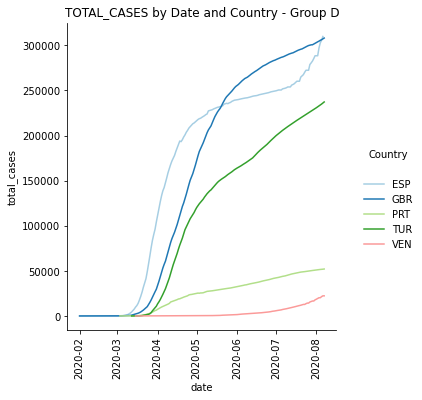

<Figure size 2160x720 with 0 Axes>

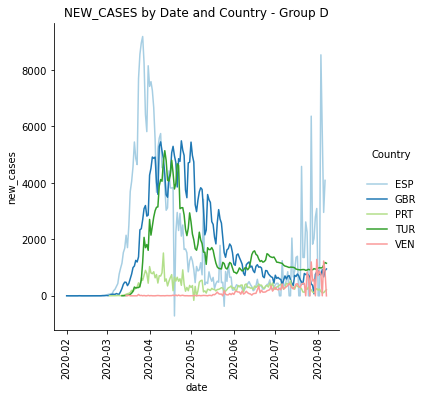

<Figure size 2160x720 with 0 Axes>

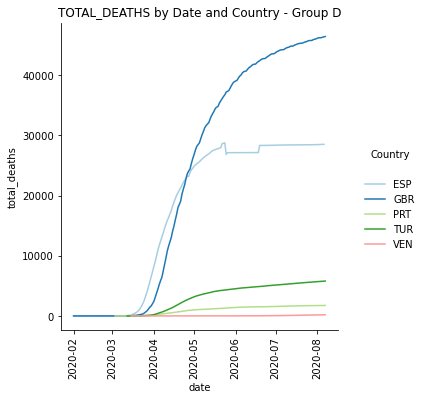

<Figure size 2160x720 with 0 Axes>

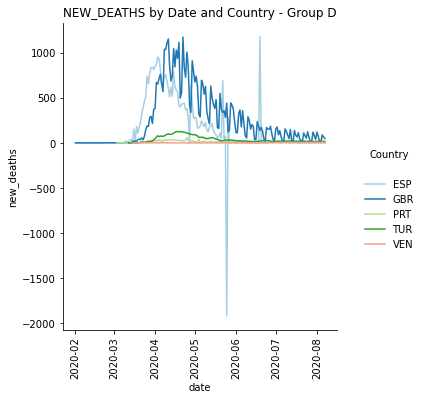

<Figure size 2160x720 with 0 Axes>

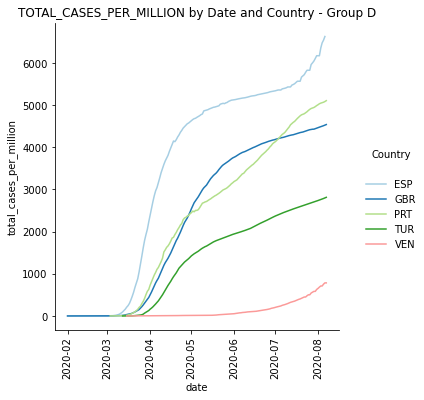

<Figure size 2160x720 with 0 Axes>

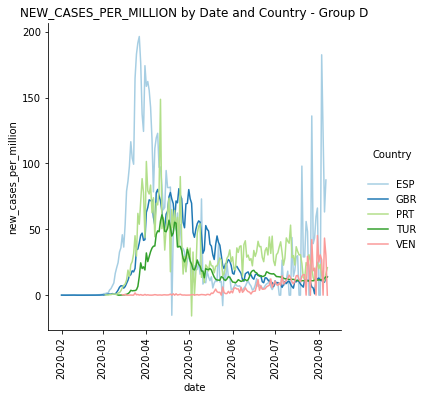

<Figure size 2160x720 with 0 Axes>

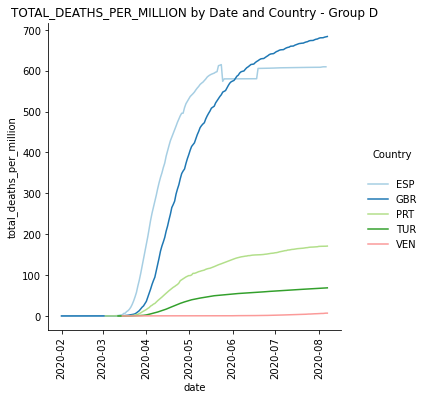

<Figure size 2160x720 with 0 Axes>

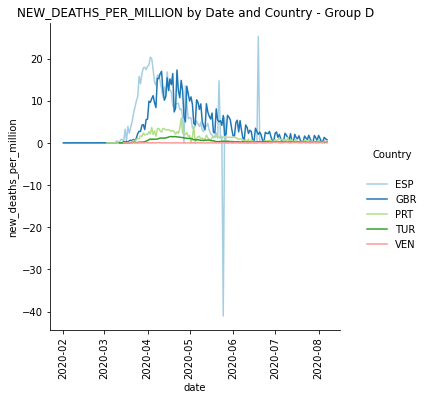

<Figure size 2160x720 with 0 Axes>

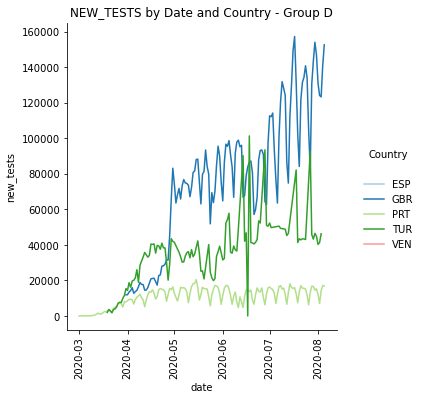

<Figure size 2160x720 with 0 Axes>

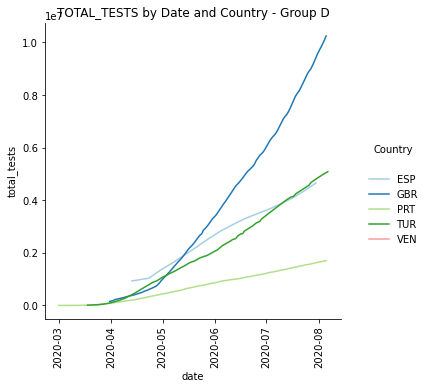

<Figure size 2160x720 with 0 Axes>

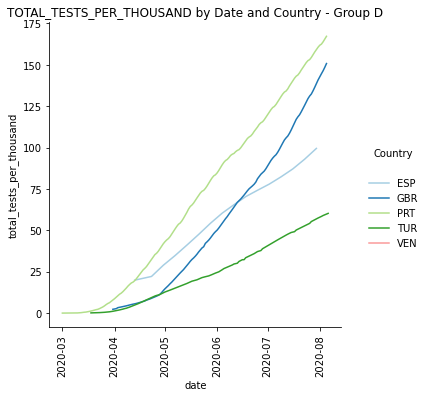

<Figure size 2160x720 with 0 Axes>

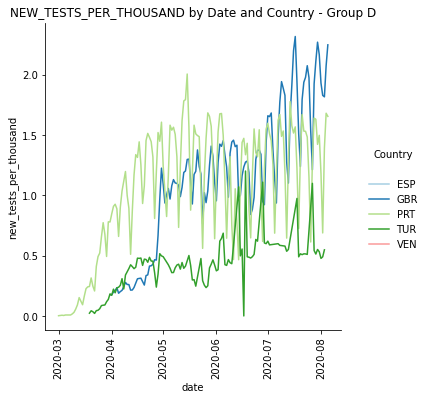

<Figure size 2160x720 with 0 Axes>

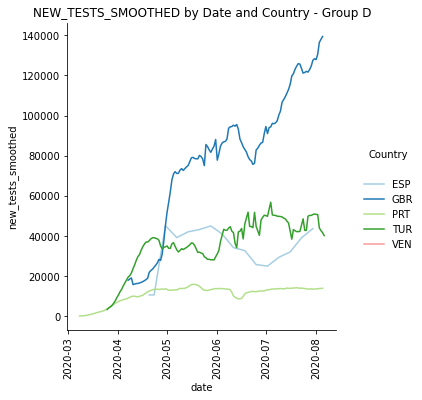

In [39]:
for elem in cols:
    graf_grupo("date" , elem , "iso_code", covid_grupoD, False )

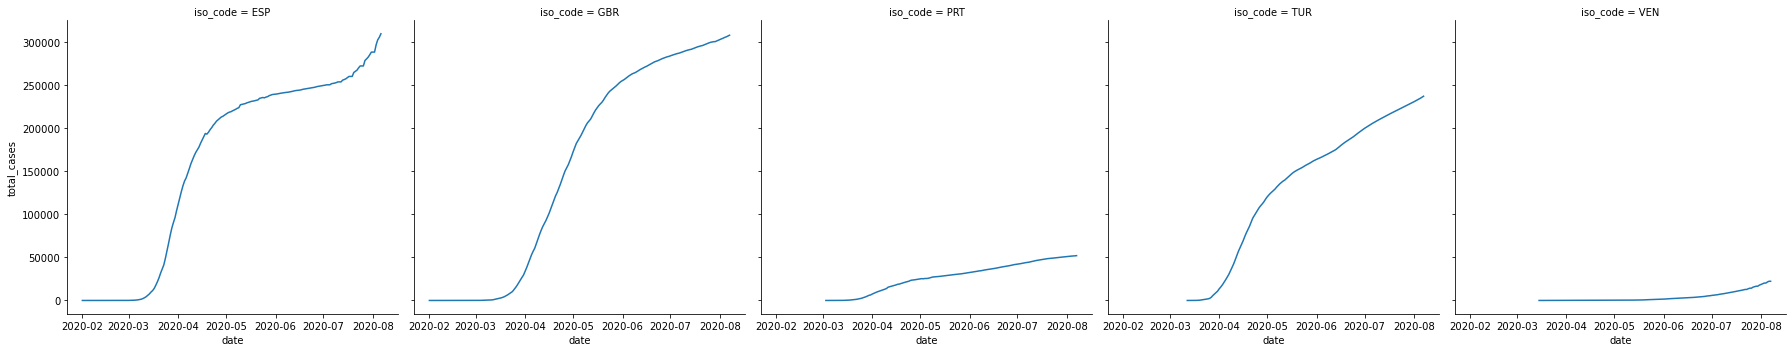

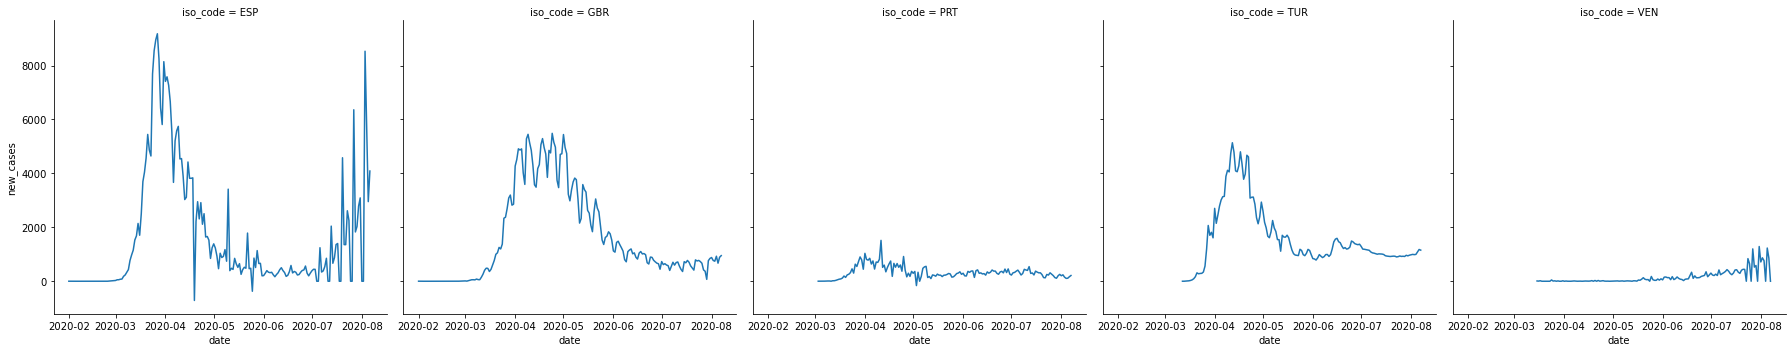

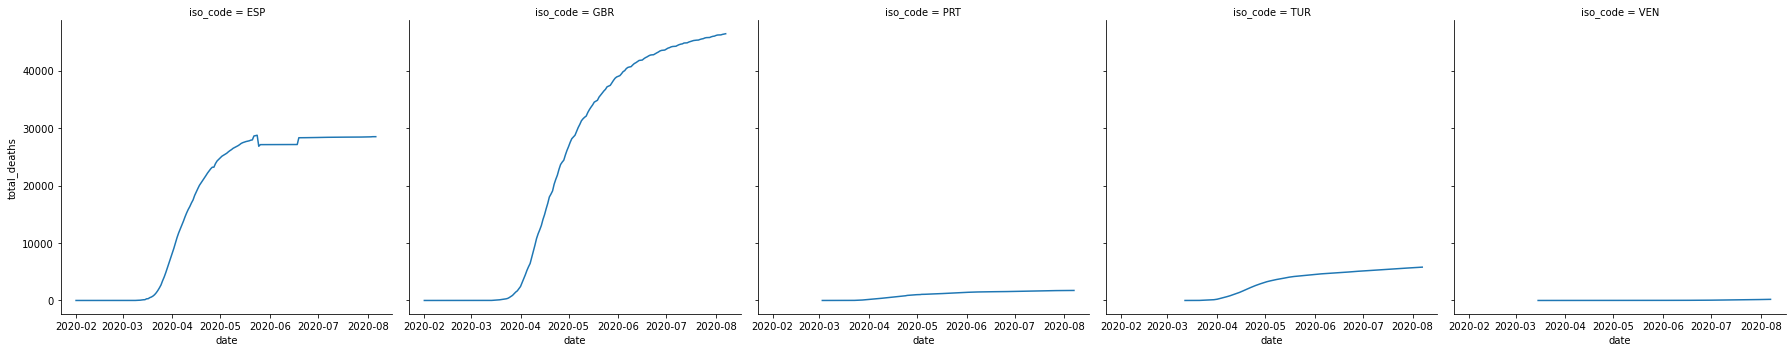

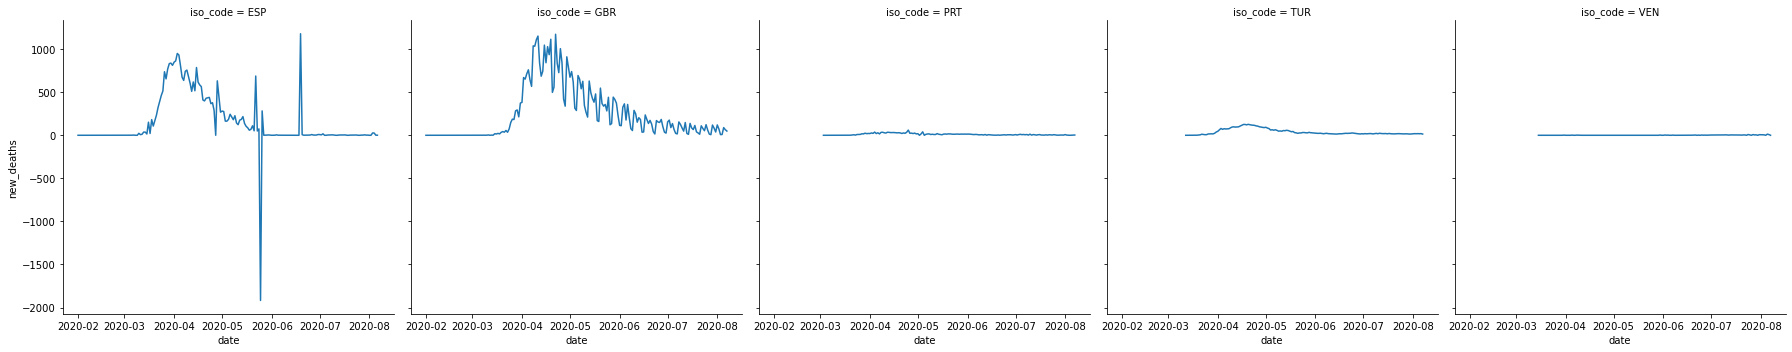

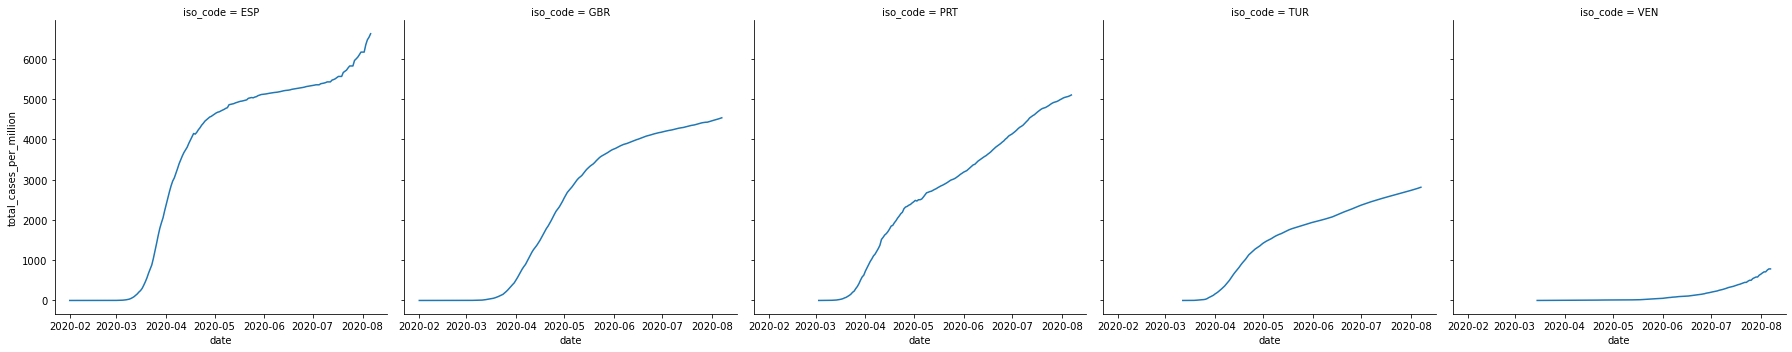

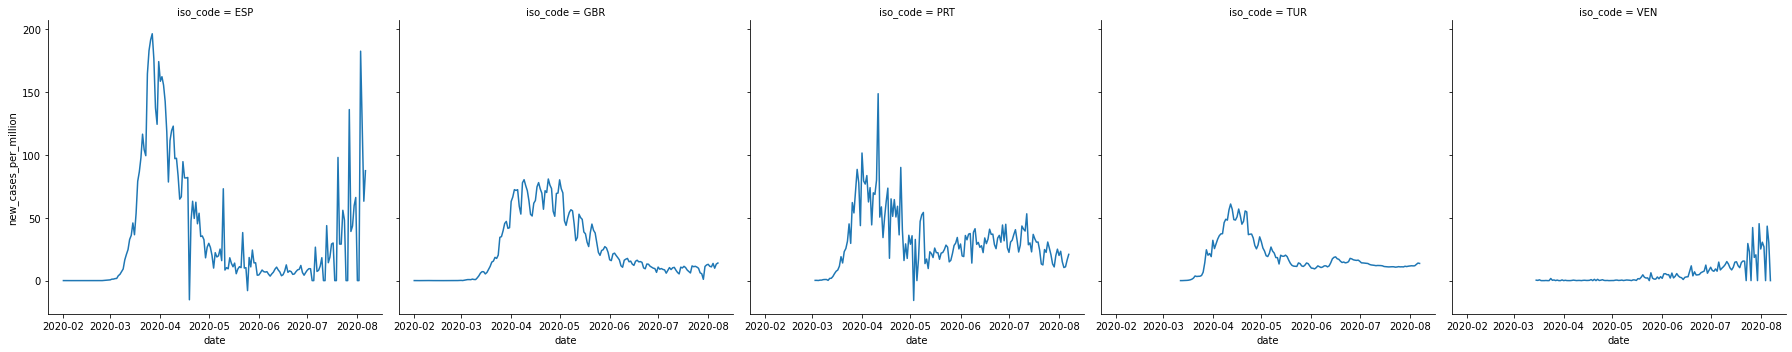

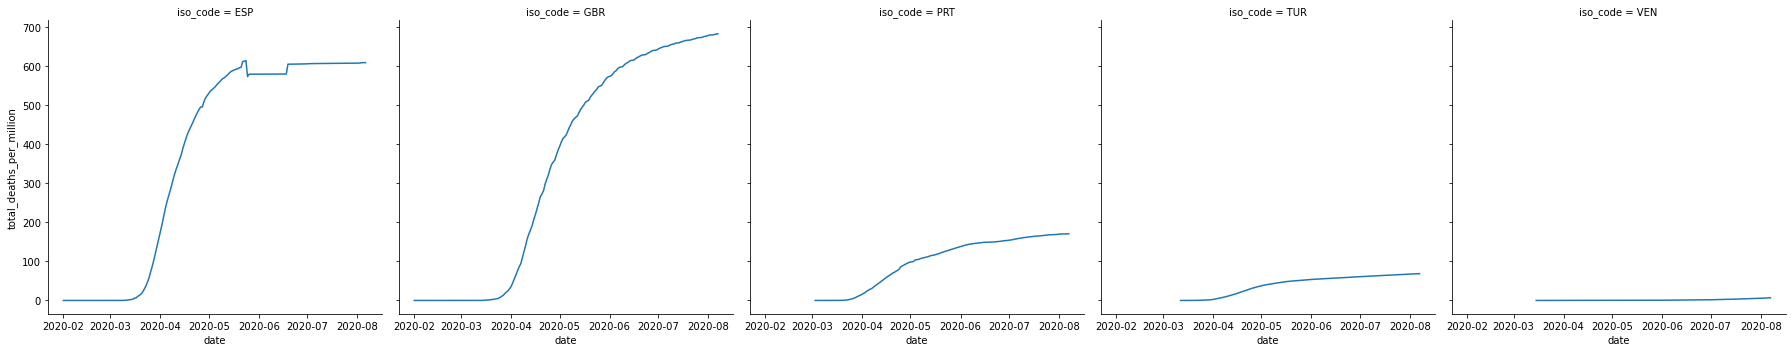

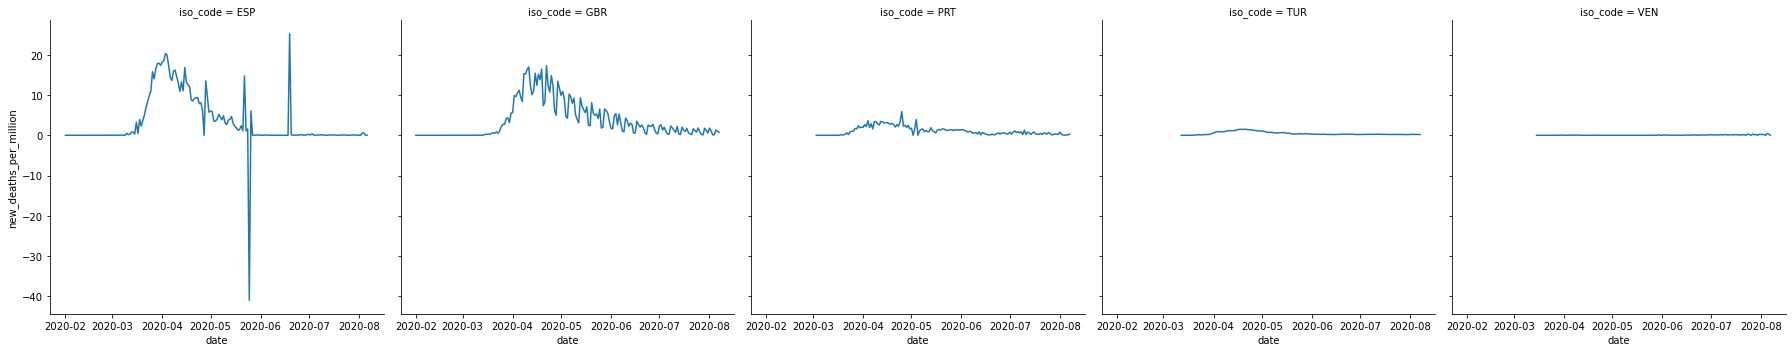

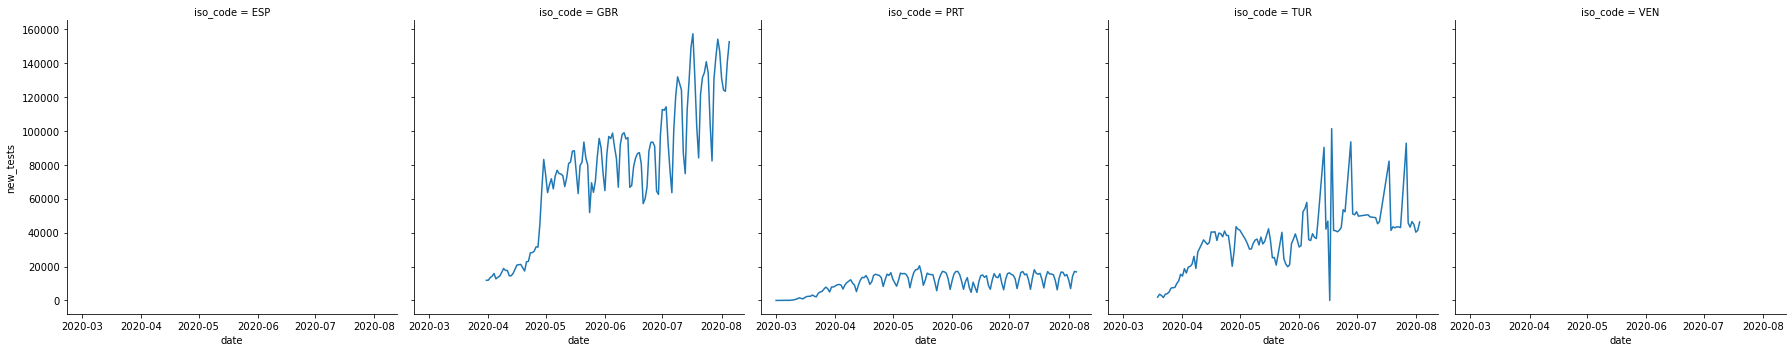

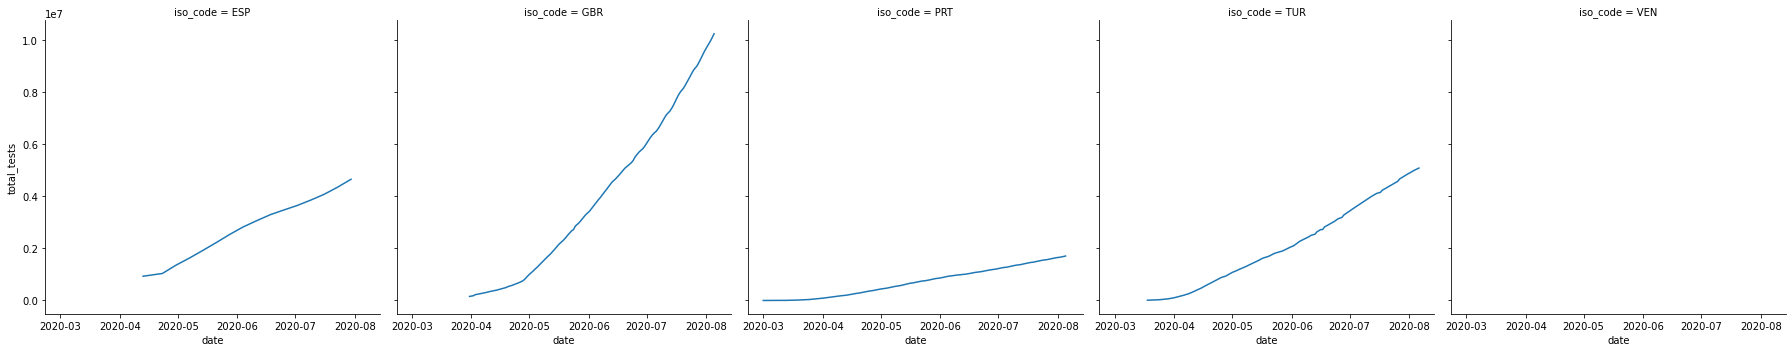

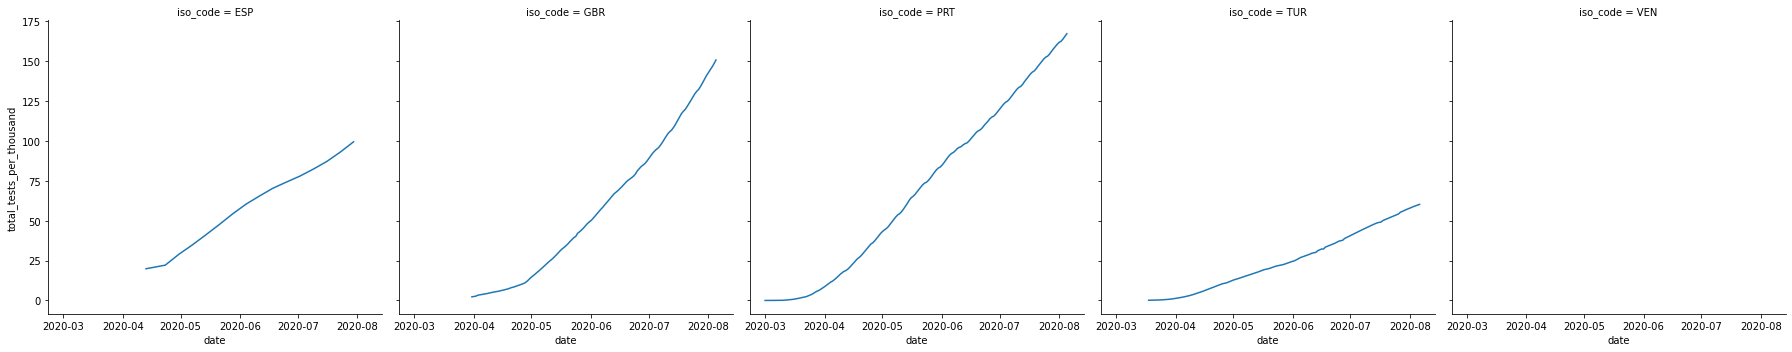

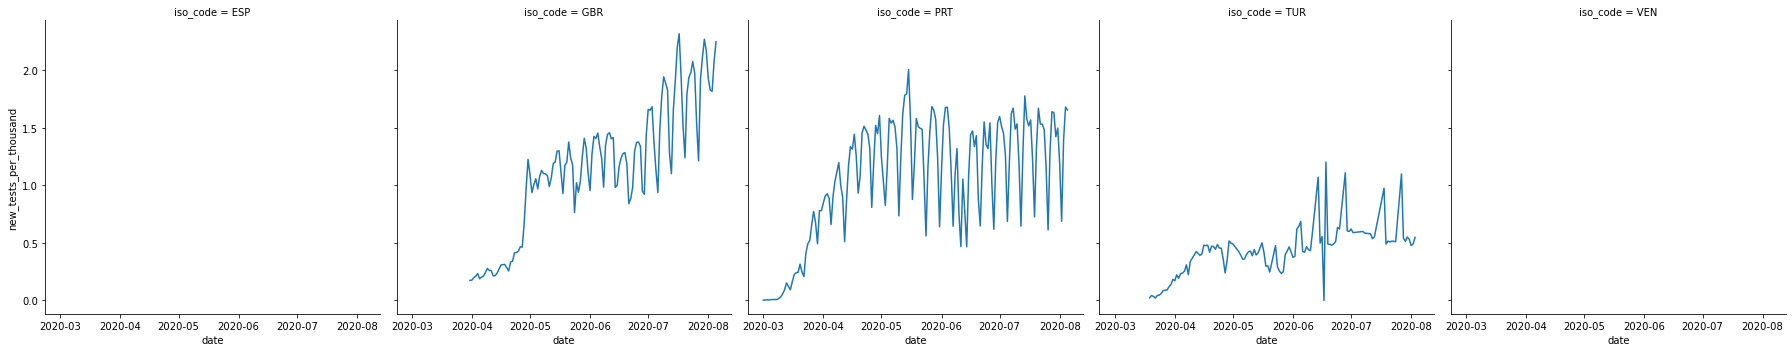

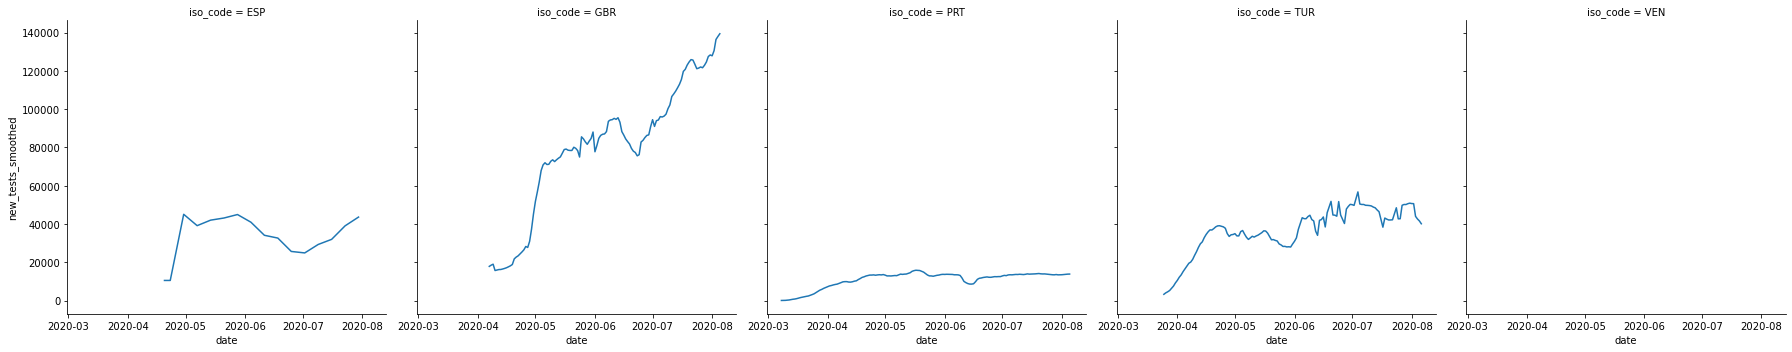

In [40]:
#Gráficos de cada variable separados por país
for elem in cols:
    sns.relplot(x="date", y=elem, col="iso_code", kind="line", data=covid_grupoD)

______________
## ANÁLISIS DETALLADO POR PAÍS
Show different tendencies for each column in your dataset. Show, vertically, the start date and end date of the alarm state in each plot
______________

### MUERTES TOTALES Y CASOS TOTALES DE CADA PAÍS (CONTRASTADOS CON FECHAS DE ESTADO DE ALARMA)

In [41]:
def graf_pais (ccode,col_dat, cname,cdf, y_maximo):
    if y_maximo:
        eje_y = cdf.total_cases.max()
        tit = cname.upper() + " COVID19 - TOTALES"
        filen= "Tot_"
    else:
        eje_y = cdf.rank_TCxM.max()
        tit = cname.upper() + " COVID19 - RANKING"
        filen= "Rank_"
    fg = cdf.plot(x="date", y= col_dat, kind="line", figsize=(12,8),title= tit)
    fg.legend(bbox_to_anchor=(1.2, 0.5))
    plt.vlines(alarm_dates.alarm_init[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.vlines(alarm_dates.alarm_end[alarm_dates.iso_code == ccode].to_frame().iloc[0,0], ymin=0, ymax=eje_y, color = "r", linestyles =":")
    plt.savefig("../resources/"+ filen + elem+".png",bbox_inches='tight')
    plt.show()

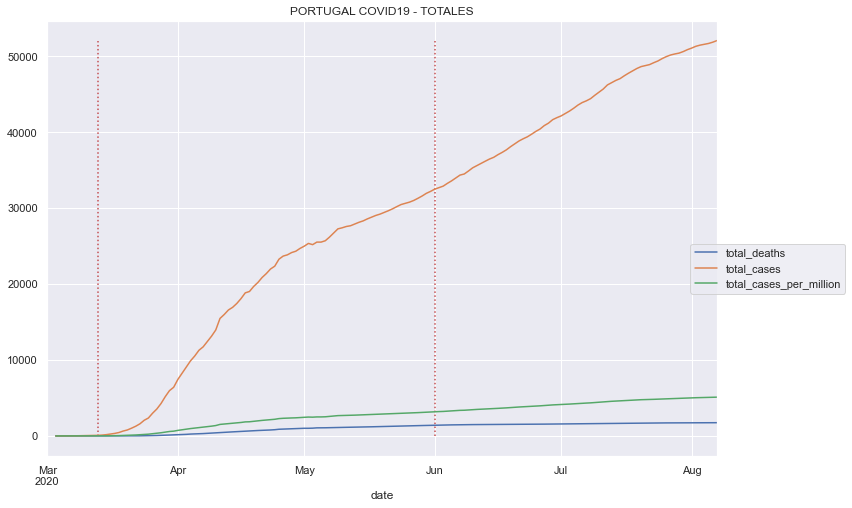

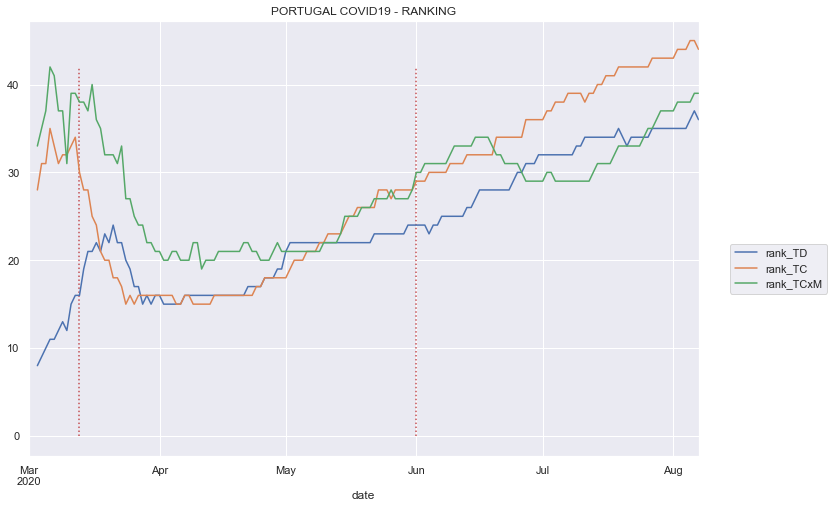

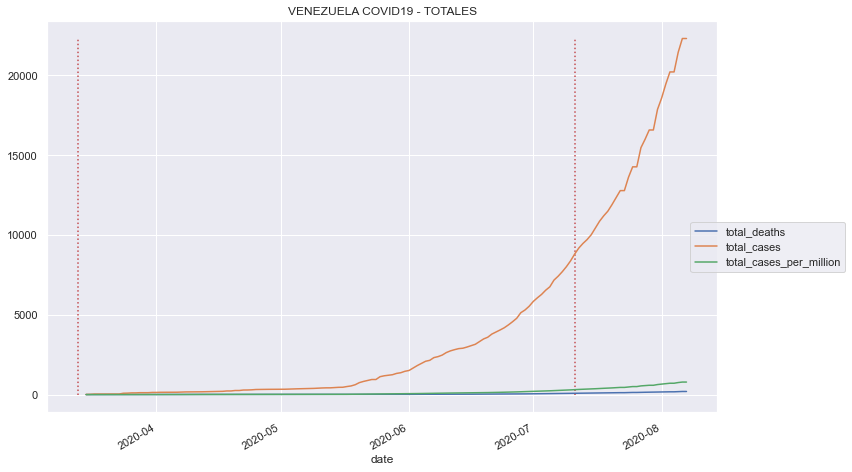

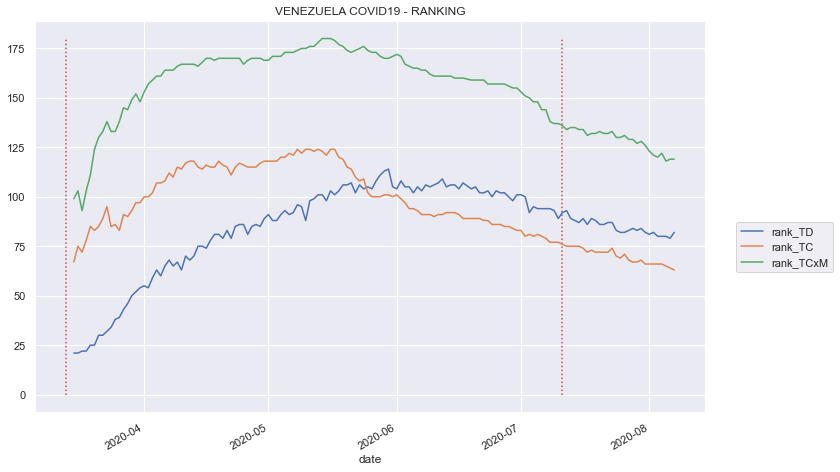

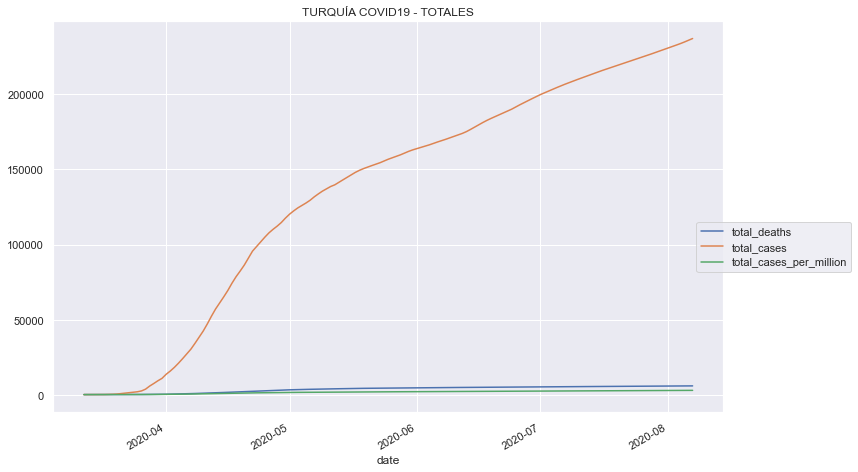

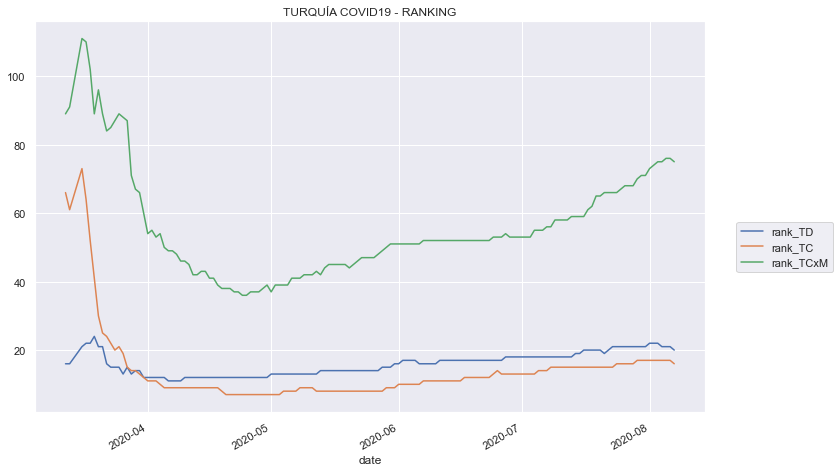

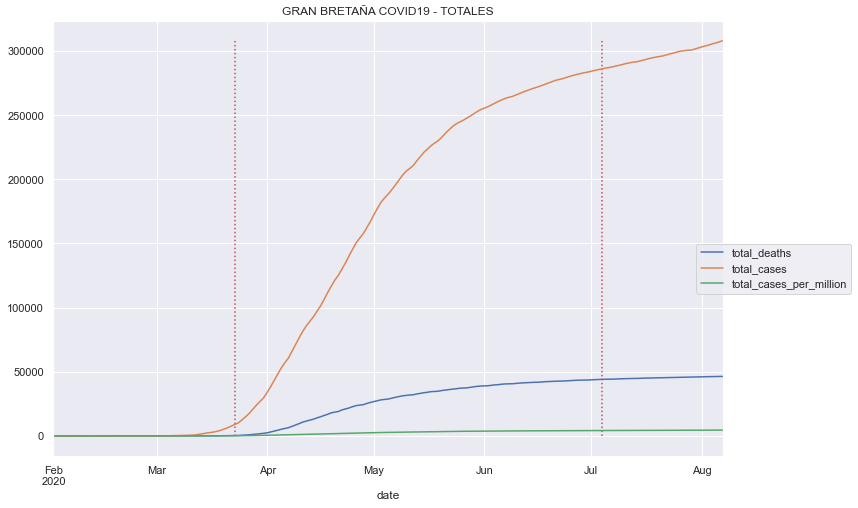

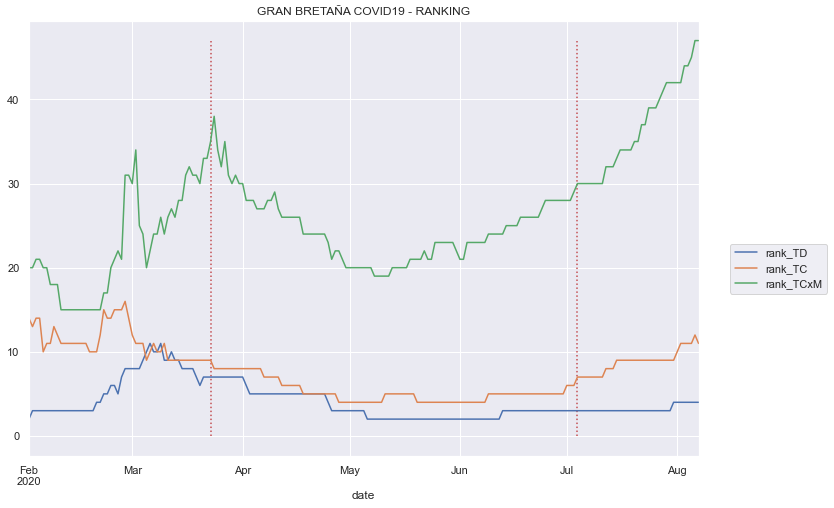

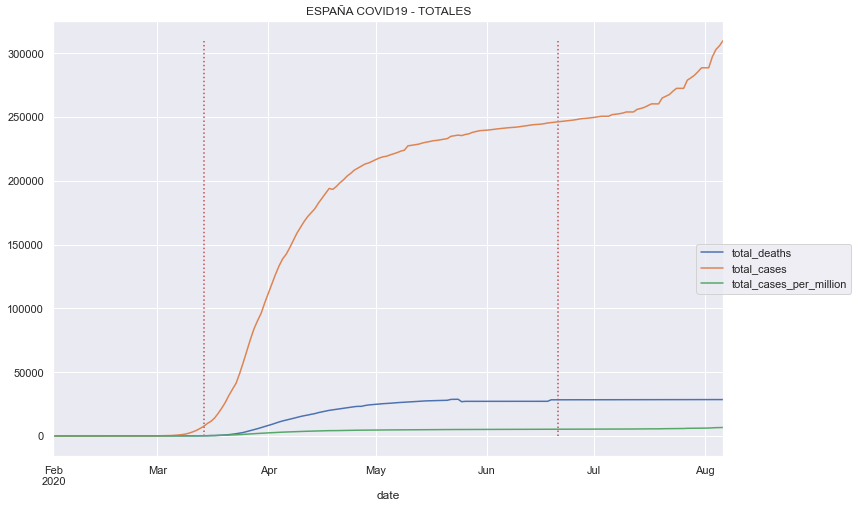

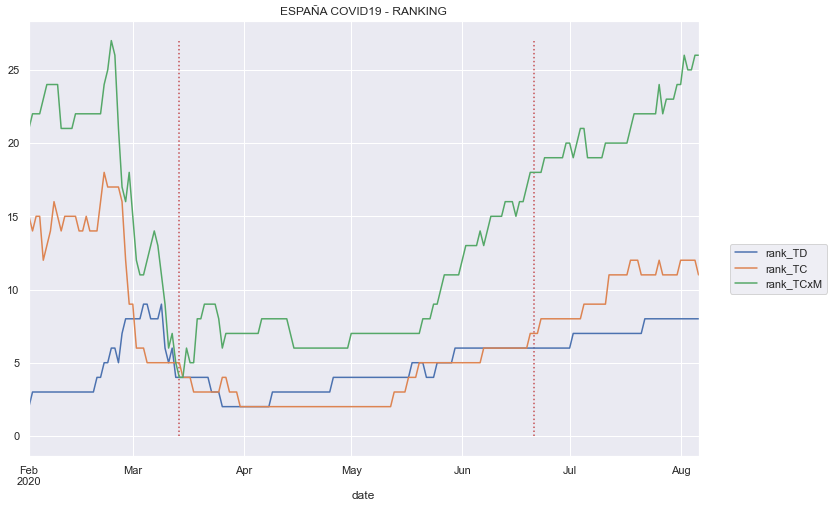

In [42]:
sns.set()
col_dat1 = ["total_deaths", "total_cases", "total_cases_per_million"]
col_dat2 = [ "rank_TD", "rank_TC", "rank_TCxM"]
for elem in paises_grupoD:
    df = covid_grupoD[covid_grupoD.iso_code==elem]
    graf_pais(elem, col_dat1, paises_nombres[elem], df, True)
    graf_pais(elem, col_dat2, paises_nombres[elem], df, False)
  


In [43]:
#Dataframe con información resumida de datos referenciales por país
datos_paises = covid_grupoD.iloc[:,[1,20,21,22,23,24,29,30,32,33]].drop_duplicates()

In [44]:
datos_paises.info()
# Nota: 
# Stringency Index: The Government Response Stringency Index is a composite measure based on nine response indicators including
# school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response).

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345 entries, 0 to 825
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   iso_code               345 non-null    object 
 1   positive_rate          308 non-null    float64
 2   tests_units            315 non-null    object 
 3   stringency_index       331 non-null    float64
 4   population             345 non-null    float64
 5   population_density     345 non-null    float64
 6   extreme_poverty        336 non-null    float64
 7   cardiovasc_death_rate  345 non-null    float64
 8   female_smokers         336 non-null    float64
 9   male_smokers           336 non-null    float64
dtypes: float64(8), object(2)
memory usage: 27.0+ KB


In [45]:
datos_paises

iso_code  positive_rate tests_units  stringency_index  population  \
0        ESP            NaN         NaN             11.11  46754783.0   
37       ESP            NaN         NaN             25.00  46754783.0   
38       ESP            NaN         NaN             45.83  46754783.0   
42       ESP            NaN         NaN             67.13  46754783.0   
44       ESP            NaN         NaN             68.98  46754783.0   
..       ...            ...         ...               ...         ...   
743      VEN            NaN         NaN             85.19  28435943.0   
763      VEN            NaN         NaN             81.48  28435943.0   
782      VEN            NaN         NaN             87.04  28435943.0   
812      VEN            NaN         NaN             86.11  28435943.0   
825      VEN            NaN         NaN               NaN  28435943.0   

     population_density  extreme_poverty  cardiovasc_death_rate  \
0                93.105              1.0                 99.403   
37               93.105              1.0                 99.403   
38               93.105              1.0                 99.403   
42               93.105              1.0                 99.403   
44               93.105              1.0                 99.403   
..                  ...              ...                    ...   
743              36.253              NaN                204.850   
763              36.253              NaN                204.850   
782              36.253              NaN                204.850   
812              36.253              NaN                204.850   
825              36.253              NaN                204.850   

     female_smokers  male_smokers  
0              27.4          31.4  
37             27.4          31.4  
38             27.4          31.4  
42             27.4          31.4  
44             27.4          31.4  
..              ...           ...  
743             NaN           NaN  
763             NaN           NaN  
782             NaN           NaN  
812             NaN           NaN  
825             NaN           NaN  

[345 rows x 10 columns]

_________
## CORRELACIÓN
______________

In [46]:
covid_grupoD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   index                            829 non-null    int64         
 1   iso_code                         829 non-null    object        
 2   continent                        829 non-null    object        
 3   location                         829 non-null    object        
 4   date                             829 non-null    datetime64[ns]
 5   total_cases                      827 non-null    float64       
 6   new_cases                        827 non-null    float64       
 7   total_deaths                     827 non-null    float64       
 8   new_deaths                       827 non-null    float64       
 9   total_cases_per_million          827 non-null    float64       
 10  new_cases_per_million            827 non-null    float64      

In [47]:
#Matriz de correlación entre variables
grupoD_corr = covid_grupoD.iloc[:,np.r_[1,5,7,9,11,22:36]]     #Un subconjunto de las variables a contrastar

In [48]:
grupoD_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   iso_code                    829 non-null    object 
 1   total_cases                 827 non-null    float64
 2   total_deaths                827 non-null    float64
 3   total_cases_per_million     827 non-null    float64
 4   total_deaths_per_million    827 non-null    float64
 5   stringency_index            798 non-null    float64
 6   population                  829 non-null    float64
 7   population_density          829 non-null    float64
 8   median_age                  829 non-null    float64
 9   aged_65_older               829 non-null    float64
 10  aged_70_older               829 non-null    float64
 11  gdp_per_capita              829 non-null    float64
 12  extreme_poverty             684 non-null    float64
 13  cardiovasc_death_rate       829 non

In [49]:
grupoD_corr.shape

(829, 19)

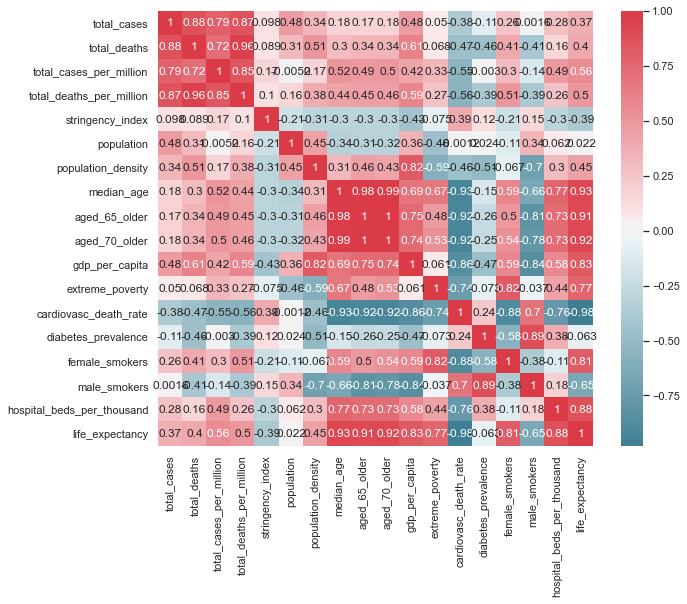

In [50]:
f, ax = plt.subplots(figsize=(10, 8)) 
corr = grupoD_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

## Matriz de correlación Todos los países.

In [51]:
#Seleccion del DF mundial del subconjunto de las variables a correlacionar
world_df_corr = world_df.iloc[:,np.r_[0,4,6,8,10,21:33,34:36]]    

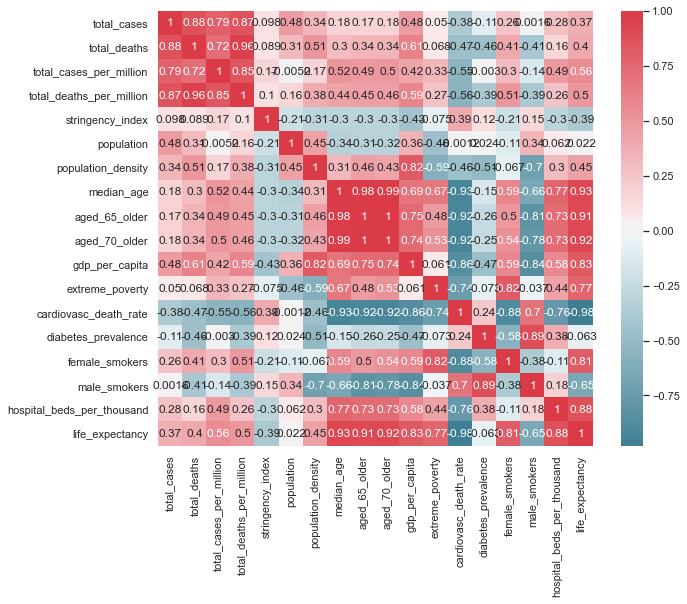

In [52]:
#Mapa de calor de la matriz de correlación 
f, ax = plt.subplots(figsize=(10, 8)) 
corr2 = world_df_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
      square=True, ax=ax, annot=True) 

### NOTA:Otras pruebas. No considerar este código

In [53]:
#Dejar únicamente las columnas que interesan para la evaluación del ranking
#world_df = world_df[["iso_code", "continent", "location", "date", "total_cases", "total_deaths", "total_cases_per_million", "stringency_index", "population", "population_density","hospital_beds_per_thousand", "life_expectancy" ]]

In [54]:
#Crea un DF por cada país (llamado covid_ESP, etc) a partir de los datos del dataframe covid_grupoD. 
#for elem in paises_grupoD:
#    df_name = "covid_" + elem
#    globals()[df_name] = covid_grupoD[covid_grupoD.iso_code==elem]

In [55]:
#for elem in cols_rank:
#    sns.relplot(x="date", y=elem, col="iso_code", kind="line", data=rank_grupoD)

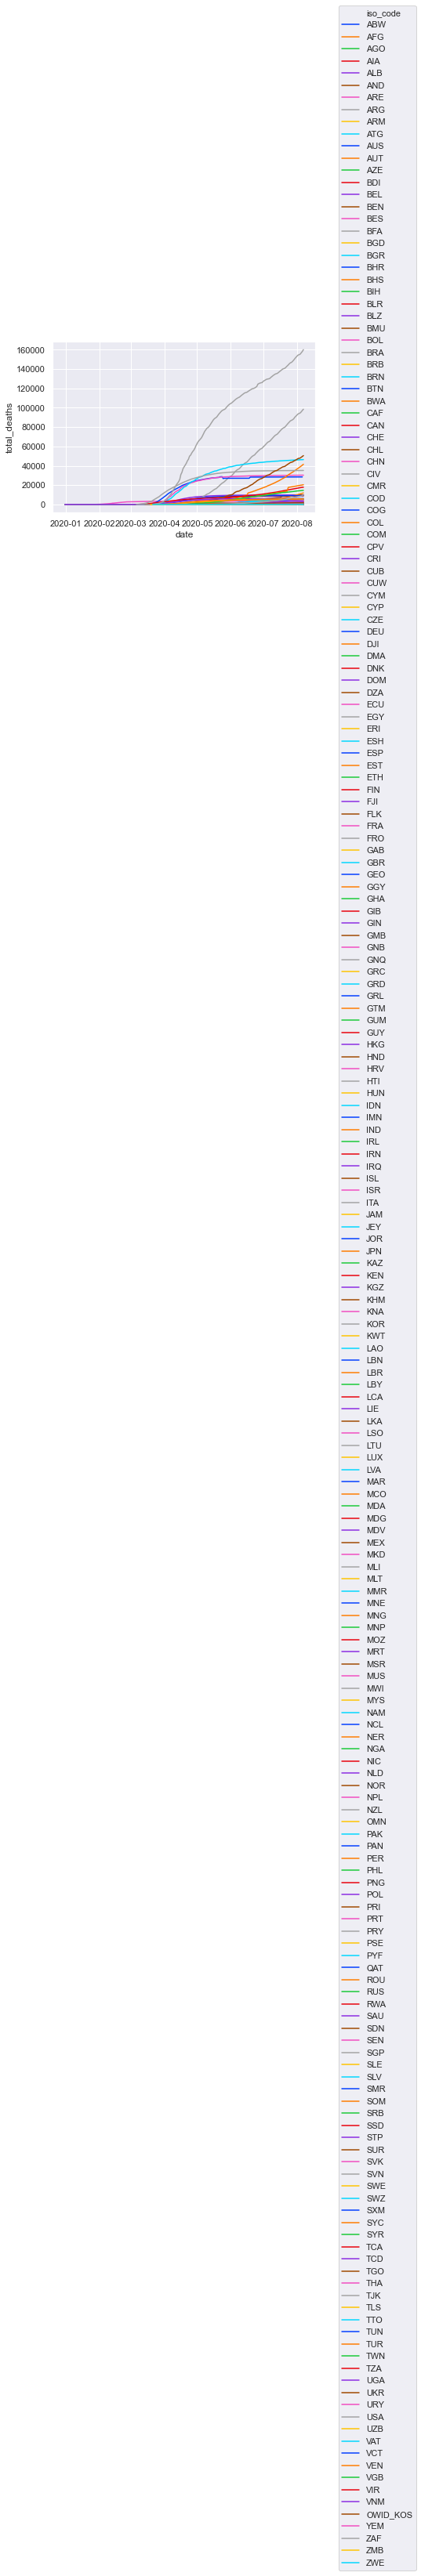

In [56]:
# Pruebas de Jose Luis.
# Para graficar total deaths de todos los paises.
lp = sns.lineplot('date','total_deaths', ci=None, hue='iso_code', palette="bright",data=world_df)
lp.legend(loc='upper right', bbox_to_anchor=(1.4,3))

# Para las líneas verticales del estado de alarma de un pais
#xposition = [pd.to_datetime('2020-03-14'), pd.to_datetime('2020-06-16')]
#for xc in xposition:
#    lp.axvline(x=xc, color='red', linestyle='--')

In [57]:
# Para poder establecer algún tipo de relación entre población de +65 y muertes por covid
# paises_grupoD=["PRT", "VEN", "TUR", "GBR", "ESP"]
# paises_nombres={"PRT":"Portugal", "VEN":"Venezuela", "TUR":"Turquía", "GBR":"Gran Bretaña", "ESP":"España"}
# covid_grupoD=world_df[world_df.iso_code.isin(paises_grupoD)]
covid_grupoD.groupby('iso_code')['total_deaths'].max()

iso_code
ESP    28752.0
GBR    46413.0
PRT     1743.0
TUR     5798.0
VEN      195.0
Name: total_deaths, dtype: float64

In [58]:
# Añado la columna del indice de mortalidad al df
covid_grupoD['mortality_rate'] = round((covid_grupoD['total_deaths']/covid_grupoD['total_cases'])*100, 2)

In [59]:
covid_grupoD.tail()

index iso_code      continent   location       date  total_cases  \
824  33784      VEN  South America  Venezuela 2020-08-03      20206.0   
825  33785      VEN  South America  Venezuela 2020-08-04      20206.0   
826  33786      VEN  South America  Venezuela 2020-08-05      21438.0   
827  33787      VEN  South America  Venezuela 2020-08-06      22299.0   
828  33788      VEN  South America  Venezuela 2020-08-07      22299.0   

     new_cases  total_deaths  new_deaths  total_cases_per_million  ...  \
824      763.0         174.0         5.0                  710.580  ...   
825        0.0         174.0         0.0                  710.580  ...   
826     1232.0         187.0        13.0                  753.905  ...   
827      861.0         195.0         8.0                  784.184  ...   
828        0.0         195.0         0.0                  784.184  ...   

     diabetes_prevalence  female_smokers  male_smokers  \
824                 6.47             NaN           NaN   
825                 6.47             NaN           NaN   
826                 6.47             NaN           NaN   
827                 6.47             NaN           NaN   
828                 6.47             NaN           NaN   

     hospital_beds_per_thousand  life_expectancy  rank_TC  rank_TD  rank_TCxM  \
824                         0.8            72.06     66.0     80.0      120.0   
825                         0.8            72.06     66.0     80.0      122.0   
826                         0.8            72.06     65.0     80.0      118.0   
827                         0.8            72.06     64.0     79.0      119.0   
828                         0.8            72.06     63.0     82.0      119.0   

     rank_TDxM  mortality_rate  
824      140.0            0.86  
825      141.0            0.86  
826      137.0            0.87  
827      137.0            0.87  
828      136.0            0.87  

[5 rows x 41 columns]

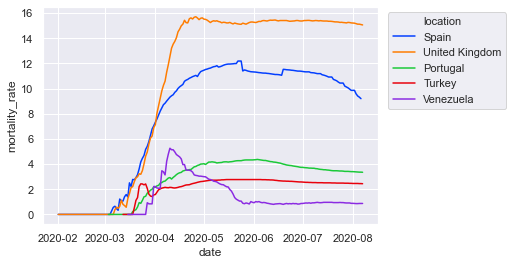

In [60]:
# Como a variado el indice de mortalidad
lp = sns.lineplot('date','mortality_rate', ci=None, hue='location', palette="bright",data=covid_grupoD) # dibujo grafico
lp.legend(loc='upper right', bbox_to_anchor=(1.4,1)) # cuadro de la leyenda 

In [61]:
world_df_map = (world_df.groupby('location')['total_cases'].max()).to_frame()
world_df_map['index'] = world_df_map.index
world_df_map.rename(columns={'index': 'country'}, inplace=True)
world_df_map

total_cases         country
location                                   
Afghanistan         36937.0     Afghanistan
Albania              6016.0         Albania
Algeria             33626.0         Algeria
Andorra               944.0         Andorra
Angola               1395.0          Angola
...                     ...             ...
Vietnam               750.0         Vietnam
Western Sahara        766.0  Western Sahara
Yemen                1767.0           Yemen
Zambia               7164.0          Zambia
Zimbabwe             4395.0        Zimbabwe

[210 rows x 2 columns]

In [62]:
import plotly.express as px 

In [64]:
fig = px.choropleth(world_df_map, locations=world_df_map['country'],
                    color=world_df_map['total_cases'],locationmode='country names', 
                    hover_name=world_df_map['country'], 
                    color_continuous_scale=px.colors.sequential.Tealgrn,template='plotly_white', )
fig.update_layout(title='Total Cases In Each Country',)
fig.show()